# About the Dataset:
#### Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

# Business Objective:

#### Here in this dataset , we have two features label and text and i am going to do sentiment analysis.

# Import libraries

In [1]:
import os
import sys
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [2]:
pwd

'C:\\Users\\avina\\OneDrive\\Desktop\\Projects'

In [3]:
df = pd.read_csv('C:\\Users\\avina\\OneDrive\\Desktop\\Projects\\text.csv')

In [4]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
df.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [8]:
df.tail()

,text,label
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3
416808,i think that after i had spent some time inves...,5


In [9]:
df.columns

Index(['text', 'label'], dtype='object')

In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
df.duplicated().sum()

686

In [12]:
df.drop_duplicates(keep="first", inplace=True)
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416123 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416123 non-null  object
 1   label   416123 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [14]:
df.corr()

,label
label,1.0


# EDA(Exploratory Data Analysis)
## Data Visualization

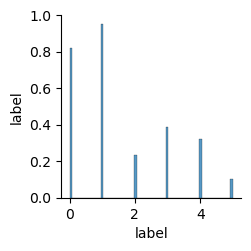

In [15]:
sns.pairplot(df)

## Description of Label according to text

#### Label_0

In [16]:
label_0 = df[df["label"]==0]
label_0["text"].iloc[10]

'i feel disheartened to message him and yet does not get a reply or any news from him'

#### Label_1

In [17]:
label_1 = df[df["label"]==1]
label_1["text"].iloc[10]

'i have been successful in providing some peace of mind i feel content'

#### Label_2

In [18]:
label_2 = df[df["label"]==2]
label_2["text"].iloc[10]

'i would not have told him or even joined the company had i not had a feeling he would be supportive'

#### Label_3

In [19]:
label_3 = df[df["label"]==3]
label_3["text"].iloc[10]

'i have to put on a mask when i come into work i have to suppress all of the emptiness i feel inside the pain and loneliness the bitter and jaded woman that i really am'

#### Label_4

In [20]:
label_4 = df[df["label"]==4]
label_4["text"].iloc[10]

'i don t want to sit inside and be alone i don t want to just do nothing but i also feel anxious overwhelmed'

#### Label_5

In [21]:
label_5 = df[df["label"]==5]
label_5["text"].iloc[10]

'i feel like that combo is kinda weird'

## WordCloud For Most Common Words in Label

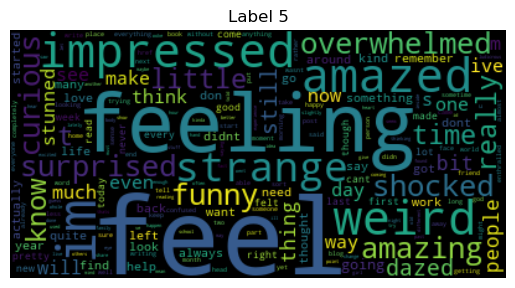

In [22]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['label']==data]
    text_cloud = ' '.join(txt for txt in text['text'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Label {data}')
    plt.axis('off')

create_cloud(5)

### Data Cleaning

In [23]:
import string
import emoji
import re
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = emoji.demojize(text)
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
df['new_text'] = df['text'].apply(cleaning_text)

In [24]:
df.head()

,text,label,new_text
0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,i dont know i feel so lost,0,i dont know i feel so lost
4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...


In [25]:
df.drop("text", axis=1, inplace = True)

In [26]:
df.head()

,label,new_text
0,4,i just feel really helpless and heavy hearted
1,0,ive enjoyed being able to slouch about relax a...
2,4,i gave up my internship with the dmrg and am f...
3,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...


In [27]:
df.tail()

,label,new_text
416804,2,i feel like telling these horny devils to find...
416805,3,i began to realize that when i was feeling agi...
416806,5,i feel very curious be why previous early dawn...
416807,3,i feel that becuase of the tyranical nature of...
416808,5,i think that after i had spent some time inves...


### Stemming for finding Root words

In [28]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

words = word_tokenize(df['new_text'].iloc[10])
for w in words:
    print(w, ':', ps.stem(w))

i : i
try : tri
to : to
be : be
nice : nice
though : though
so : so
if : if
you : you
get : get
a : a
bitchy : bitchi
person : person
on : on
the : the
phone : phone
or : or
at : at
the : the
window : window
feel : feel
free : free
to : to
have : have
a : a
little : littl
fit : fit
and : and
throw : throw
your : your
pen : pen
at : at
her : her
face : face


In [29]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["new_text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

### Getting Subjectivity and Polarity

In [30]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head()

,label,new_text,subjectivity,polarity
0,4,i just feel really helpless and heavy hearted,0.350000,0.000
1,0,ive enjoyed being able to slouch about relax a...,0.448611,0.025
2,4,i gave up my internship with the dmrg and am f...,1.000000,-0.600
3,0,i dont know i feel so lost,0.000000,0.000
4,4,i am a kindergarten teacher and i am thoroughl...,1.000000,0.000


In [31]:
df.tail()

,label,new_text,subjectivity,polarity
416804,2,i feel like telling these horny devils to find...,0.500000,0.500000
416805,3,i began to realize that when i was feeling agi...,0.000000,0.000000
416806,5,i feel very curious be why previous early dawn...,0.416667,-0.099167
416807,3,i feel that becuase of the tyranical nature of...,0.397222,0.194444
416808,5,i think that after i had spent some time inves...,0.493750,0.043750


### Sentiment Analysis

In [32]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [33]:
df["sentiment_analysis"] = df["polarity"].apply(analysis)

In [34]:
df.head()

,label,new_text,subjectivity,polarity,sentiment_analysis
0,4,i just feel really helpless and heavy hearted,0.350000,0.000,Neutral
1,0,ive enjoyed being able to slouch about relax a...,0.448611,0.025,Positive
2,4,i gave up my internship with the dmrg and am f...,1.000000,-0.600,Negative
3,0,i dont know i feel so lost,0.000000,0.000,Neutral
4,4,i am a kindergarten teacher and i am thoroughl...,1.000000,0.000,Neutral


In [35]:
df.tail()

,label,new_text,subjectivity,polarity,sentiment_analysis
416804,2,i feel like telling these horny devils to find...,0.500000,0.500000,Positive
416805,3,i began to realize that when i was feeling agi...,0.000000,0.000000,Neutral
416806,5,i feel very curious be why previous early dawn...,0.416667,-0.099167,Negative
416807,3,i feel that becuase of the tyranical nature of...,0.397222,0.194444,Positive
416808,5,i think that after i had spent some time inves...,0.493750,0.043750,Positive


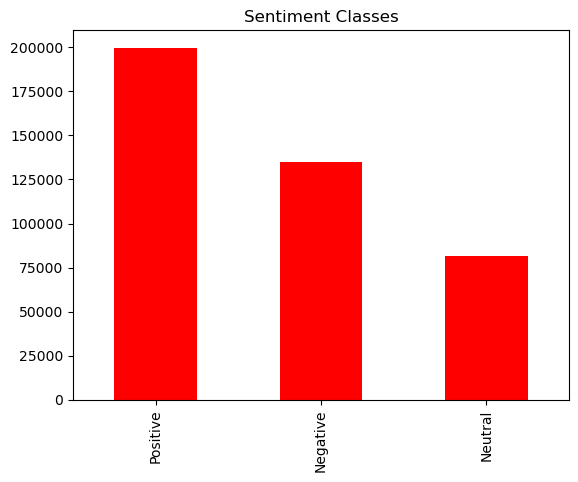

In [36]:
df.sentiment_analysis.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classes')
plt.show()

Text(0, 0.5, 'Subjectivity')

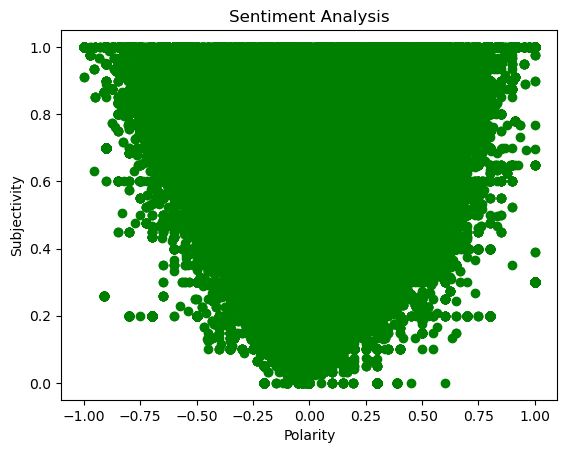

In [37]:
plt.scatter(df.polarity, df.subjectivity, color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [39]:
df = df[['new_text','sentiment_analysis']]
df.head()

,new_text,sentiment_analysis
0,i just feel really helpless and heavy hearted,Neutral
1,ive enjoyed being able to slouch about relax a...,Positive
2,i gave up my internship with the dmrg and am f...,Negative
3,i dont know i feel so lost,Neutral
4,i am a kindergarten teacher and i am thoroughl...,Neutral


In [40]:
df.tail()

,new_text,sentiment_analysis
416804,i feel like telling these horny devils to find...,Positive
416805,i began to realize that when i was feeling agi...,Neutral
416806,i feel very curious be why previous early dawn...,Negative
416807,i feel that becuase of the tyranical nature of...,Positive
416808,i think that after i had spent some time inves...,Positive


In [41]:
df = df[df['sentiment_analysis']!= 'Neutral']
df.head()

,new_text,sentiment_analysis
1,ive enjoyed being able to slouch about relax a...,Positive
2,i gave up my internship with the dmrg and am f...,Negative
6,i would think that whomever would be lucky eno...,Positive
7,i fear that they won t ever feel that deliciou...,Positive
8,im forever taking some time out to have a lie ...,Negative


In [42]:
df.tail()

,new_text,sentiment_analysis
416803,i cry and feel a sense of loss when my patient...,Positive
416804,i feel like telling these horny devils to find...,Positive
416806,i feel very curious be why previous early dawn...,Negative
416807,i feel that becuase of the tyranical nature of...,Positive
416808,i think that after i had spent some time inves...,Positive


## Conclusion: From above data analysis we have done Sentiment analysis.

## Thank you!